#Inference with nnU-Net v2 2D

*Source: Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211*

*https://github.com/MIC-DKFZ/nnUNet*

####1. Installing Requirements

In [1]:
!pip install -q nnunetv2 nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.0 MB/s eta 0:00:00


####2. Setting environment variables

In [2]:
import os

os.environ["nnUNet_raw"] = "/content/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/content/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/nnUNet_results"

# create folders
for path in [os.environ["nnUNet_preprocessed"], os.environ["nnUNet_results"]]:
    os.makedirs(path, exist_ok=True)

####3. Downloading Dataset

In [3]:
!pip install wldhx.yadisk-direct
!yadisk-direct https://disk.360.yandex.ru/d/oGH9iQAi_Y6tAg > direct_link.txt
!cat direct_link.txt
!wget -O test_nnunet.zip "$(cat direct_link.txt)"

https://downloader.disk.yandex.ru/disk/ce4e4d64810f02fffa99f687bb7bf1bbb57b10aea8653aa588d5223a0a16e7dc/694c8ef0/fKqInKw3d7bLFOeFnMGnhPjpFa3Trtr1Qzf5MvQ7TrswHtoyqguZXWo44MuQR2gPaFLARlhvFaQqETZuLQKRuNNb3qN053X46l2tZOeluwyr8npumZHI4midPdWhecNq?uid=0&filename=test_nnunet.zip&disposition=attachment&hash=qYuqGhpuYwmtwBRSCijFDMeVaL3Y5WvwvNl%2BbUjFz/Rteh%2B5a2DpQv3MIkQ1b%2Brh/CH%2B%2BsnE5duAiqM/EjDILQ%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=1130000067809040&fsize=1454817675&hid=902b76f3063b581261d011906a2f79b0&media_type=compressed&tknv=v3
--2025-12-24 21:10:08--  https://downloader.disk.yandex.ru/disk/ce4e4d64810f02fffa99f687bb7bf1bbb57b10aea8653aa588d5223a0a16e7dc/694c8ef0/fKqInKw3d7bLFOeFnMGnhPjpFa3Trtr1Qzf5MvQ7TrswHtoyqguZXWo44MuQR2gPaFLARlhvFaQqETZuLQKRuNNb3qN053X46l2tZOeluwyr8npumZHI4midPdWhecNq?uid=0&filename=test_nnunet.zip&disposition=attachment&hash=qYuqGhpuYwmtwBRSCijFDMeVaL3Y5WvwvNl%2BbUjFz/Rteh%2B5a2DpQv3MIkQ1b%2Brh/CH%2B%2BsnE5duAiqM/EjDILQ%3D%3D%3A&limit=0&con

In [4]:
!unzip 'test_nnunet.zip'

Archive:  test_nnunet.zip
   creating: test_nnunet/
  inflating: __MACOSX/._test_nnunet  
   creating: test_nnunet/nnUNet_raw/
  inflating: __MACOSX/test_nnunet/._nnUNet_raw  
  inflating: test_nnunet/.DS_Store   
  inflating: __MACOSX/test_nnunet/._.DS_Store  
  inflating: test_nnunet/checkpoint_best.pth  
  inflating: __MACOSX/test_nnunet/._checkpoint_best.pth  
  inflating: test_nnunet/dataset_fingerprint.json  
  inflating: __MACOSX/test_nnunet/._dataset_fingerprint.json  
   creating: test_nnunet/gt_labels/
  inflating: __MACOSX/test_nnunet/._gt_labels  
  inflating: test_nnunet/plans.json  
  inflating: __MACOSX/test_nnunet/._plans.json  
  inflating: test_nnunet/dataset.json  
  inflating: __MACOSX/test_nnunet/._dataset.json  
  inflating: test_nnunet/nnUNet_raw/.DS_Store  
  inflating: __MACOSX/test_nnunet/nnUNet_raw/._.DS_Store  
   creating: test_nnunet/nnUNet_raw/Dataset500_BraTS2021/
  inflating: __MACOSX/test_nnunet/nnUNet_raw/._Dataset500_BraTS2021  
  inflating: test_nnu

In [5]:
# Create the full structure
!cp -r '/content/test_nnunet/nnUNet_raw' '/content/nnUNet_raw'

!mkdir -p /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/fold_0

# Copy model weights into fold_0
!cp /content/test_nnunet/checkpoint_best.pth \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/fold_0/

# Copy JSON config files into the config folder
!cp /content/test_nnunet/plans.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/

!cp /content/test_nnunet/dataset.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/

!cp /content/test_nnunet/dataset_fingerprint.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/

####4. Testing

In [6]:
!nnUNetv2_predict \
  -d 500 \
  -i /content/nnUNet_raw/Dataset500_BraTS2021/imagesTs \
  -o /content/brats_test_preds \
  -f 0 \
  -c 2d -chk /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_best.pth \
  --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 125 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 125 cases that I would like to predict

Predicting BraTS_0010:
perform_everything_on_device: True
100% 138/138 [00:07<00:00, 18.44it/s]
sending off prediction to background worker for resampling and export
done with BraTS_0010

Predicting BraTS_0020:
perform_everything_on_device: True
100% 135/135 [00:06<00:00, 21.09it/s]
sending off prediction to background worker for resampling and export
done with BraTS_0020

Predicting BraTS_0030:
perform_everything_on_device: T

####5. Evaluation

In [7]:
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for medpy: filename=MedPy-0.5.2-py3-none-any.whl size=224710 sha256=3e59baf78c9acbc7f7905b4f50e5ca11c4c50af6fc1a91a116fd492b818dbbd6
  Stored in directory: /root/.cache/pip/wheels/89/5a/f8/b3def53b9c2133d2f8698ea2173bb5df63bd8e761ce8e9aec9
Successfully built medpy


In [11]:
import pandas as pd
import numpy as np
import nibabel as nib
from medpy.metric.binary import dc, hd95

GT = "/content/test_nnunet/gt_labels"
PRED = "/content/brats_test_preds"  # prediction folder

def load(path):
    return nib.load(path).get_fdata().astype(np.uint8)

def region(mask, labels):
    return np.isin(mask, labels).astype(np.uint8)

def nii_files(folder):
    return sorted(
        f for f in os.listdir(folder)
        if f.endswith(".nii.gz")
    )

regions = {
    "WT": [1, 2, 3],
    "TC": [1, 3],
    "ET": [3]
}

rows = []

gt_files = nii_files(GT)
pred_files = nii_files(PRED)

if set(gt_files) != set(pred_files):
    raise ValueError("GT and prediction filenames do not match!")

for fname in gt_files:
    gt_path = os.path.join(GT, fname)
    pred_path = os.path.join(PRED, fname)

    # Load GT with header for spacing
    gt_nii = nib.load(gt_path)
    gt = gt_nii.get_fdata().astype(np.uint8)
    pr = load(pred_path)

    # Voxel spacing (sx, sy, sz)
    voxel_spacing = gt_nii.header.get_zooms()[:3]

    for rname, lbls in regions.items():
        gt_r = region(gt, lbls)
        pr_r = region(pr, lbls)

        if gt_r.sum() == 0 and pr_r.sum() == 0:
            d, h = 1.0, 0.0
        elif gt_r.sum() == 0:
            d, h = 0.0, np.inf
        else:
            if pr_r.sum() == 0:
                d, h = 0.0, np.inf
            else:
                d = dc(pr_r, gt_r)
                h = hd95(pr_r, gt_r, voxelspacing=voxel_spacing)

        rows.append({
            "case": fname[:-7],
            "region": rname,
            "dice": d,
            "hd95": h if np.isfinite(h) else 373.13,
        })

df = pd.DataFrame(rows)

summary = df.groupby("region")[["dice", "hd95"]].mean()
print("\n Test Set Scores (Mean per Region) ")
print(summary)

mean_wt = df[df['region'] == 'WT']['dice'].mean()
mean_tc = df[df['region'] == 'TC']['dice'].mean()
mean_et = df[df['region'] == 'ET']['dice'].mean()
brats_score = (mean_wt + mean_tc + mean_et) / 3
print(f"\nOverall mean Dice (WT/TC/ET): {brats_score:.4f}")

df.to_csv('/content/brats_test_scores_full.csv', index=False)
print("\nFull results saved to /content/brats_test_scores_full.csv")


 Test Set Scores (Mean per Region) 
            dice      hd95
region                    
ET      0.836860  9.902257
TC      0.898145  4.610913
WT      0.922083  4.827219

Overall mean Dice (WT/TC/ET): 0.8857

Full results saved to /content/brats_test_scores_full.csv


####6. Visualization

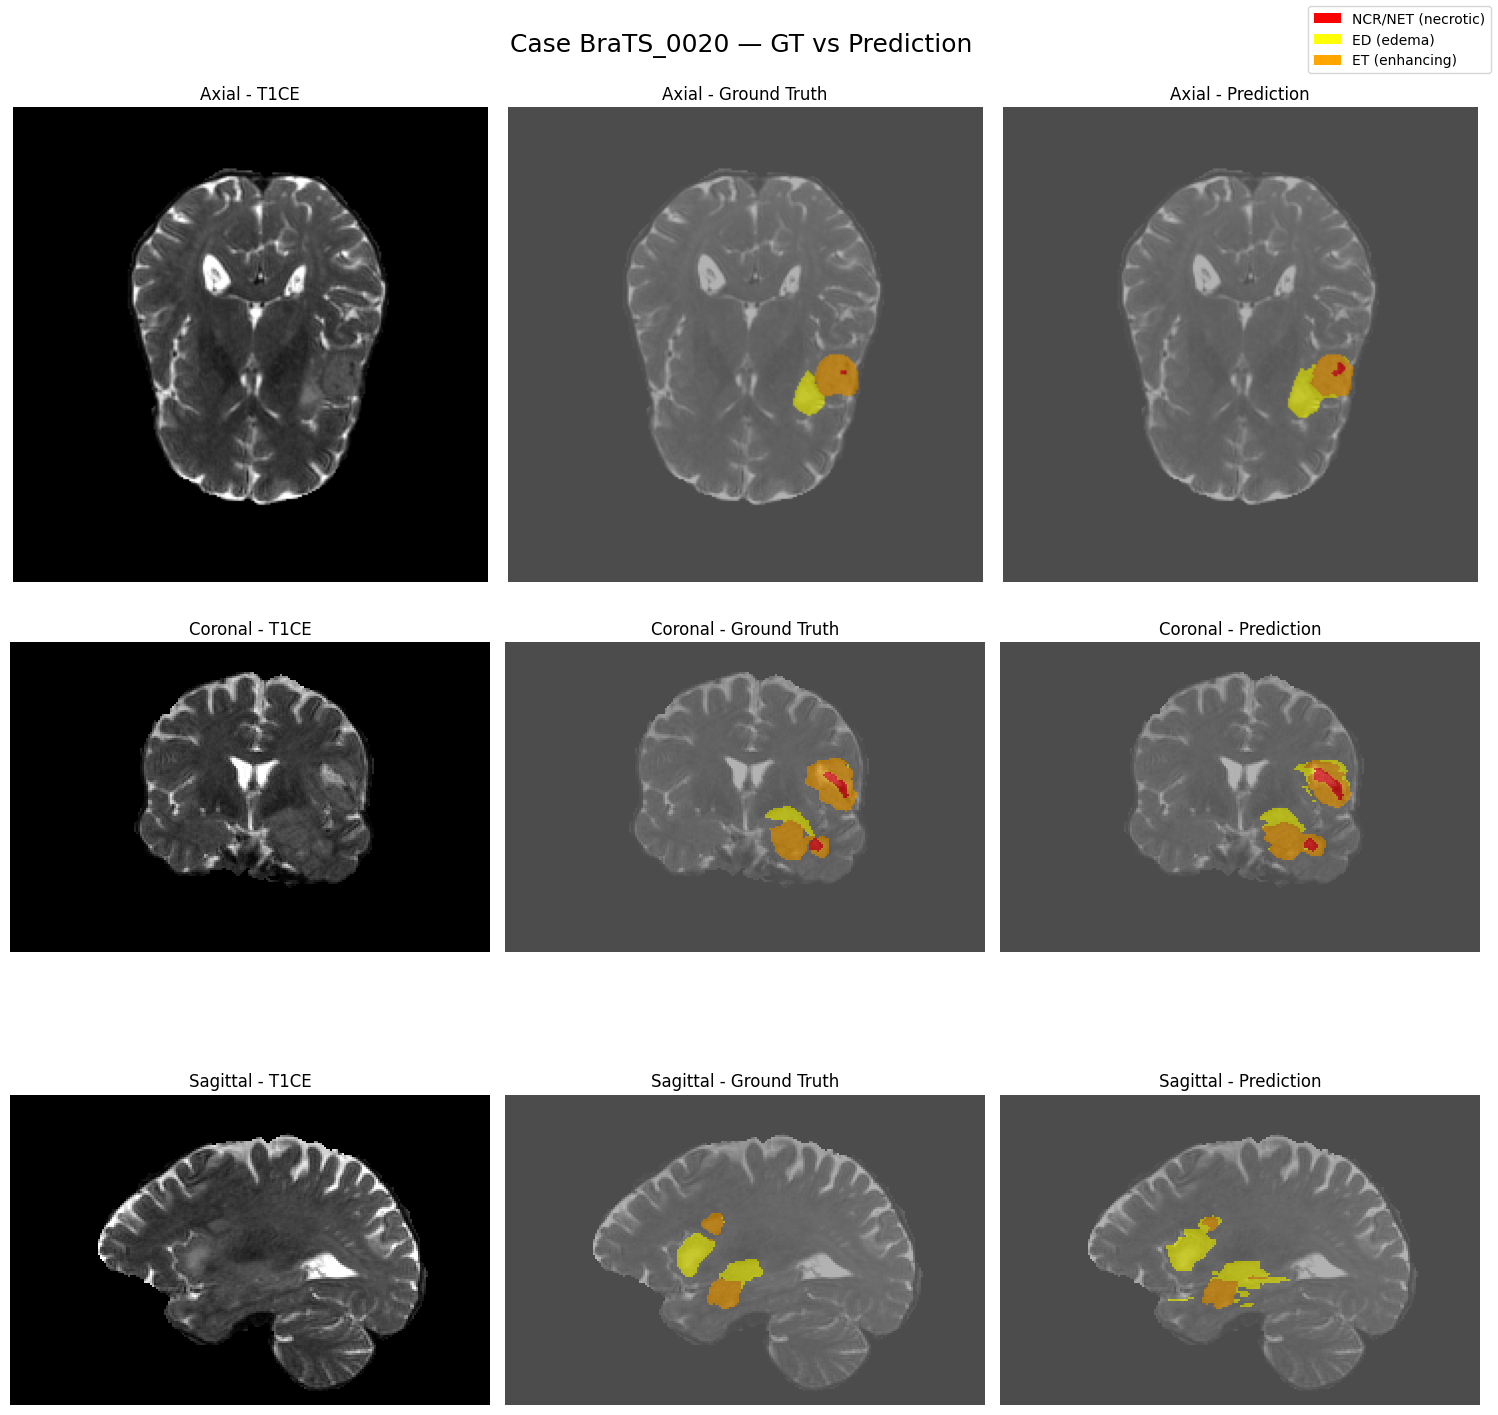

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Settings
CASE_ID = "BraTS_0020"  # Change to your desired test case

# Directories
IMAGES_TS_DIR = "/content/nnUNet_raw/Dataset500_BraTS2021/imagesTs"
GT_DIR = "/content/test_nnunet/gt_labels"
PR_DIR = "/content/brats_test_preds"

MODALITY = "t1ce"

# Colormap
# 0: background = gray
# 1: NCR/NET (necrotic) = red
# 2: ED (edema) = yellow
# 3: ET (enhancing) = orange
colors = ["gray", "red", "yellow", "orange"]
seg_cmap = ListedColormap(colors)

# Load T1CE for background
mod_path = os.path.join(IMAGES_TS_DIR, f"{CASE_ID}_0002.nii.gz")
mod_nii = nib.load(mod_path)
mod_data = mod_nii.get_fdata()

# Normalize for display
p99 = np.percentile(mod_data[mod_data > 0], 99)
mod_disp = np.clip(mod_data / p99, 0, 1)

# Load GT and prediction
gt = nib.load(os.path.join(GT_DIR, f"{CASE_ID}.nii.gz")).get_fdata().astype(np.uint8)
pr = nib.load(os.path.join(PR_DIR, f"{CASE_ID}.nii.gz")).get_fdata().astype(np.uint8)

# Slice selection
# Find axial slice with max whole tumor area
wt_gt = np.isin(gt, [1, 2, 3])
tumor_per_axial = np.sum(wt_gt, axis=(0, 1))
axial_slice = np.argmax(tumor_per_axial)

# Coronal (max tumor in y-axis view)
tumor_per_coronal = np.sum(wt_gt, axis=(0, 2))
coronal_slice = np.argmax(tumor_per_coronal)

# Sagittal (max tumor in x-axis view)
tumor_per_sagittal = np.sum(wt_gt, axis=(1, 2))
sagittal_slice = np.argmax(tumor_per_sagittal)

# Plot
views = [
    ("Axial", axial_slice, mod_disp[:, :, axial_slice], gt[:, :, axial_slice], pr[:, :, axial_slice]),
    ("Coronal", coronal_slice, mod_disp[:, coronal_slice, :], gt[:, coronal_slice, :], pr[:, coronal_slice, :]),
    ("Sagittal", sagittal_slice, mod_disp[sagittal_slice, :, :], gt[sagittal_slice, :, :], pr[sagittal_slice, :, :])
]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for row, (view_name, sl, bg_slice, gt_slice, pr_slice) in enumerate(views):
    # Background (T1CE)
    axes[row, 0].imshow(bg_slice.T, cmap="gray", origin="lower")
    axes[row, 0].set_title(f"{view_name} - T1CE")
    axes[row, 0].axis("off")

    # GT segmentation
    im1 = axes[row, 1].imshow(bg_slice.T, cmap="gray", origin="lower")
    im2 = axes[row, 1].imshow(gt_slice.T, cmap=seg_cmap, vmin=0, vmax=3, alpha=0.6, origin="lower")
    axes[row, 1].set_title(f"{view_name} - Ground Truth")
    axes[row, 1].axis("off")

    # Prediction segmentation
    axes[row, 2].imshow(bg_slice.T, cmap="gray", origin="lower")
    axes[row, 2].imshow(pr_slice.T, cmap=seg_cmap, vmin=0, vmax=3, alpha=0.6, origin="lower")
    axes[row, 2].set_title(f"{view_name} - Prediction")
    axes[row, 2].axis("off")

plt.suptitle(f"Case {CASE_ID} — GT vs Prediction \n"
            #  "Colors: Necrotic=red, Edema=yellow, Enhancing=orange"
             , fontsize=18)
plt.tight_layout()

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="red", label="NCR/NET (necrotic)"),
    Patch(facecolor="yellow", label="ED (edema)"),
    Patch(facecolor="orange", label="ET (enhancing)")
]
fig.legend(handles=legend_elements, loc="upper right", fontsize=10)

plt.show()